iVBORw0KGgoAAAANSUhEUgAAA0wAAAM8CAIAAADr3bchAAEAAElEQVR4nOz92ZbsSJIdCm5RVQBm5u7nnBgyI5NDZS0u8r6wm1x9X7n4H/3SP9Bfevv2G9lcvZq3WCTrVmVFxnyOD2YGQFX6QXQQhQJ2PDKyqjIjIQ/mcAwKnaGydYsI/T//H/93JCGi/KvPgOUMAyAj9wAAMwMwxuRfOSO/1loA7IMkxRxQS7yZNl7NWJyR+4lMPh8kBcmYSiGEkG6m/KCI5FPfLBmz1ujH8/3OuXymftbk39l7yW7gAMB7L9ktVRfziVyBoamNtgLlRYYMAA4MgHSjxPTSberxdMaqm8s9pCq8bRSdZp2akcfralzmHPllqdLkrO4qcl6SlboyqpWh7iciyWFKXLcpVCKldXT+2xLpdkTVB3j1qa1cLUrxGmmHVf6/rZbcuPr5NkmkepC21plMx6X2yFi5X7+CwPnV+kGdmRDKuEtJLTubFpVMlSbqqpNLXo21eEa15jzPSDOJjEQ5L92m67qcJjWtiXogV5OS6o1+GslP5Do2Tu6M3YMDTZeDc7AuuAHGyLN6/plnL29pXyQ3yCPGGAQf5hFE5L0JE4MIbPoDjJPXWWvhuv5wys9K6VJBYncHYr8Jweuat87lvDnrSoWgzDZSKSFWsgfg/Zwz3LamVHien6dpUvkJAOSMtNc4jgDGccrnX85nAMMwAPDznJ/ygfOvZFgyM/syeeYeEud2Y/Ml6erSbdJty0lbRO5vp/TYt03pCXEorbWgPtZndM/cGgj6jB7jRbgdfXoMeqyNyvg6AKmTdJ0D0Pcd6mkQXJpJfs/nFzn4zW9+A+Df/V/+HYDT6QTg7nAEMAwHpI9v3w/In1cZ8qos8T8qmU61pGtAZSafVMezfCtjZfDit54G5XXNxBgvbg7/th0ZTWdIOcj5bzuP3CPtPl2lMi8Afvjw4fv37wH89X//HwCenp/zbfIrr75erzmp2OFnj/Rl

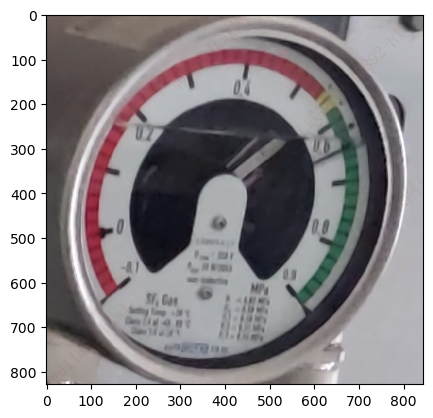

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import base64

# read a labeled segmentation sample from a json file
seg = open('meter3.json').read()
# convert from string to json object
seg = json.loads(seg)
# show the image string
print(seg['imageData'])
# get image size from segmentation object
im_size = (seg['imageHeight'], seg['imageWidth'])
print(im_size)
# decode from base64 string into image
im_data = base64.b64decode(seg['imageData'])
im = np.frombuffer(im_data, dtype=np.uint8) # create numpy array from base64 string
im = cv2.imdecode(im,cv2.IMREAD_UNCHANGED) # decode image into numpy array
# convert image from RGB into BGR format
im = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
print(im.shape)
# show the image on screen
plt.imshow(im) 
plt.show()


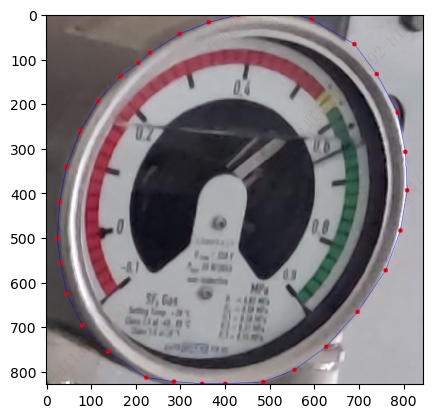

True

In [89]:
# draw the segmentation keypoints from json
first_kpt = None
last_kpt = None
pts = []
vis = im.copy()
for keypoint in seg['shapes'][0]['points']: 
    x, y = int(keypoint[0]), int(keypoint[1])
    pts.append((x,y))
    cv2.circle(vis, (x,y), 5, (255,0,0), -1)
    # line up these keypoints
    if first_kpt == None: 
        first_kpt = (x,y)
    if last_kpt is not None:
        cv2.line(vis, (x,y), last_kpt, (0,0,255), 1)
    last_kpt = (x,y)

# close up the head and tail keypoints
cv2.line(vis, last_kpt, first_kpt, (0,0,255), 1)
# show the image on screen
plt.imshow(vis)
plt.show()
# convert image from RGB to BGR
vis = cv2.cvtColor(vis,cv2.COLOR_BGR2RGB)
# save the image to a file
cv2.imwrite('segmentation_keypoints.jpg', vis)


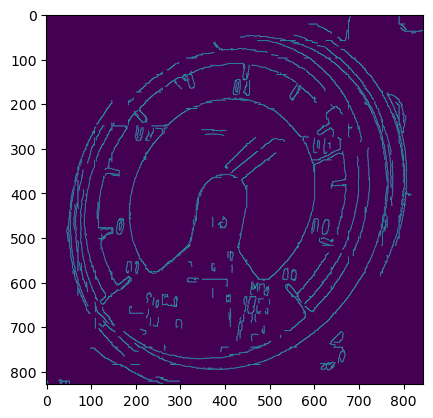

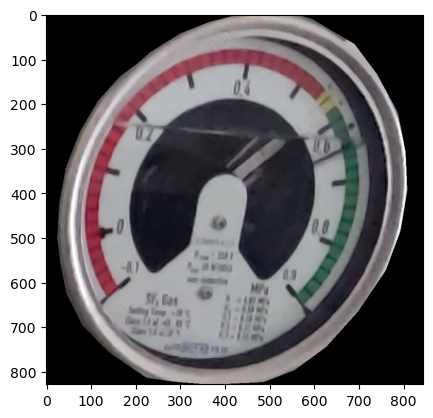

In [90]:
# check the format of contour in opencv
edge_ = cv2.Canny(im, 50, 150, L2gradient=True)
plt.imshow(edge_)
plt.show()

contours, _ = cv2.findContours(edge_, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw mask from contours
mask = np.zeros([im.shape[0],im.shape[1]], dtype=np.uint8) # create a black image to draw on
pts_arr = np.array(pts, dtype=np.int32) # convert the points to integer values to draw on the image
pts_arr = [pts_arr.reshape((pts_arr.shape[0],1,2))] # reshape to a line as OpenCv requires it to be a 2D array

cv2.drawContours(mask, pts_arr, 0, 255, -1) # fill the shape with 255 (solid)
masked_im = cv2.bitwise_and(im, im, mask=mask) # apply the mask to the image
plt.imshow(masked_im)
plt.show()

((416.2278747558594, 413.9942321777344), (825.74169921875, 783.8389892578125), 89.5416488647461)


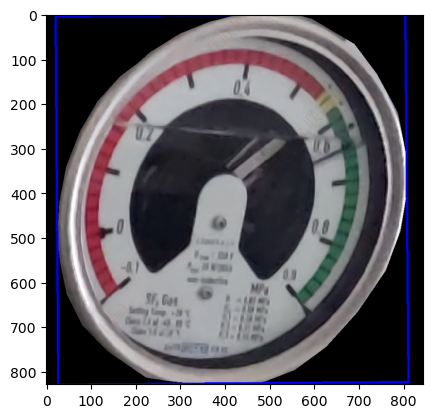

In [94]:
# find the smallest rect to cover the contour area
rect = cv2.minAreaRect(pts_arr[0]) # get the rect of the object to cover it with lines and circles
print(rect)
# 
box = cv2.boxPoints(rect) # convert the rect to points (x,y,w,h) for OpenCv's draw
box = np.int0(box) # convert the points to integers so that cv2.drawContours can draw them as lines.
plt.imshow(cv2.drawContours(masked_im, [box], -1, (0,0,255), 3)) # draw the box with green color in the image. The -1 means draw all the contours. The 3 means the thickness of the line.
plt.show()
